In [116]:
import numpy as np 
import pandas as pd
import pickle,os, copy
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
import sys
sys.path.append("..")
from nets import Nets
from utils import *

import re

from sklearn.cluster import DBSCAN

from interpolation import *


from postprocessing import *
from analysis import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [224]:
exp_root = "/Users/daniellengyel/flat_sharp/flat_sharp/experiments/{}" #"/Users/daniellengyel/flat_sharp/gaussian/gaussian_experiments/Apr03_17-38-00_Daniels-MacBook-Pro-4.local"
# configs = get_configs(experiment_folder)

In [245]:
# get all sorts of data
exp_dict = {}

experiment_folder = exp_root.format("CIFAR10/LeNet_good") #Apr27_00-03-27_Daniels-MacBook-Pro-4.local
exp_dict["stuff"] = get_stuff(experiment_folder)
# exp_dict["models"] = get_all_models(experiment_folder, -1)
exp_dict["resampling_idxs"] = get_sample_idxs(experiment_folder)

Getting tsne.
Error: tsne could not be found
Getting runs.
Getting trace.
Getting acc.
Getting dist.
Error: dist could not be found
Getting loss.
Getting grad.
Error: grad could not be found


In [246]:


stats_df = get_end_stats(exp_dict)
# stats_df = stats_df[stats_df["Mean Train Loss"] < 0.25]
stats_df.sort_values(by="Acc Test Mean", ascending=False)

Did not use lineages for 1592413223.93683


Acc Test Max  Acc Test Mean  Acc Test Min  Acc Train Max  \
1592413246.799235         0.4563       0.455295        0.4542         0.9998   
1592413259.185267         0.4545       0.454120        0.4530         1.0000   
1592413229.555752         0.4549       0.450075        0.4455         0.9686   
1592413250.2111201        0.4422       0.441390        0.4405         0.9998   
1592413255.041078         0.4422       0.441160        0.4398         1.0000   
1592413223.93683          0.4620       0.435110        0.4148         0.9992   
1592413226.287563         0.4347       0.431945        0.4258         0.9816   
1592413243.539297         0.4325       0.420335        0.4084         0.9678   
1592413235.712426         0.1003       0.100300        0.1003         0.0998   
1592413239.476272         0.1002       0.100200        0.1002         0.1000   
1592413232.625796         0.1001       0.100100        0.1001         0.0996   

                    Acc Train Mean  Acc Train Min  Gap Mean  Loss Test Max  \
1592413246.799235          0.99980         0.9998 -0.544505       4.086415   
1592413259.185267          1.00000         1.0000 -0.545880       4.309265   
1592413229.555752          0.96212         0.9526 -0.512045       4.242355   
1592413250.2111201         0.99980         0.9998 -0.558410       4.266486   
1592413255.041078          1.00000         1.0000 -0.558840       4.443960   
1592413223.93683           0.97124         0.9366 -0.536130       4.609825   
1592413226.287563          0.97480         0.9652 -0.542855       4.090471   
1592413243.539297          0.93160         0.9016 -0.511265       3.821440   
1592413235.712426          0.09980         0.0998  0.000500       2.302701   
1592413239.476272          0.10000         0.1000  0.000200       2.302701   
1592413232.625796          0.09960         0.0996  0.000500       2.302701   

                    Loss Test Mean  Loss Test Min  Loss Train Max  \
1592413246.799235         4.082451       4.077384        0.005695   
1592413259.185267         4.307052       4.302831        0.003242   
1592413229.555752         4.135538       3.872680        0.173517   
1592413250.2111201        4.258092       4.250955        0.007252   
1592413255.041078         4.437080       4.429020        0.003499   
1592413223.93683          4.120949       3.506543        0.198023   
1592413226.287563         3.926879       3.828407        0.123187   
1592413243.539297         3.486980       3.323235        0.293352   
1592413235.712426         2.302701       2.302701        2.302668   
1592413239.476272         2.302701       2.302701        2.302668   
1592413232.625796         2.302701       2.302701        2.302668   

                    Loss Train Mean  Loss Train Min  Path Weight Sum  \
1592413246.799235          0.005656        0.005602     22413.551720   
1592413259.185267          0.003237        0.003232     23467.906235   
1592413229.555752          0.139757        0.115494     16824.834742   
1592413250.2111201         0.007163        0.007096     24439.769802   
1592413255.041078          0.003463        0.003452     23196.861619   
1592413223.93683           0.093637        0.005275     21747.148291   
1592413226.287563          0.082613        0.063712     21798.191079   
1592413243.539297          0.210387        0.101998     20882.770665   
1592413235.712426          2.302668        2.302668         4.086981   
1592413239.476272          2.302668        2.302668         3.287315   
1592413232.625796          2.302668        2.302668         5.234750   

                     Trace Max  Trace Mean  Trace Mean Std   Trace Min  \
1592413246.799235    44.475757   42.350000        3.241662   40.862999   
1592413259.185267    35.805236   32.398042        2.251142   29.885427   
1592413229.555752   510.262789  404.065208       47.309517  300.953238   
1592413250.2111201   55.078431   52.132493        3.708074   49.463828   
1592413255.041078    34.453462   33.021186        2.495288

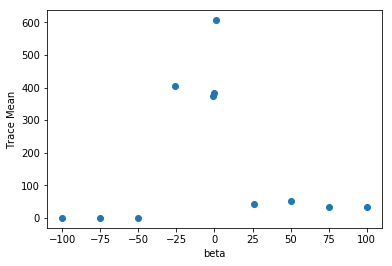

In [247]:


plot_stats(stats_df,  "softmax_beta", "Trace Mean",  
           filter_seperate=[], filter_not_seperate=[], 
           X_axis_bounds=None, Y_axis_bounds=None,
          X_axis_display_name="beta", Y_axis_display_name=None)




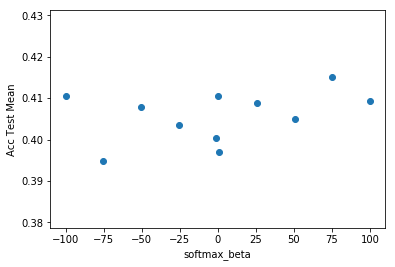

In [238]:

            
plot_stats(stats_df,  "softmax_beta", "Acc Test Mean", 
           filter_seperate=[], filter_not_seperate=[], 
           Y_axis_bounds=None)



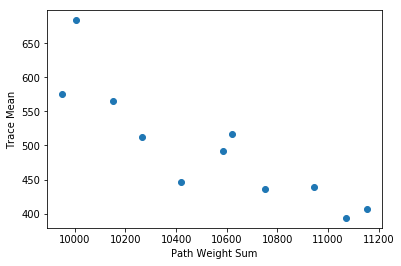

In [239]:

            
plot_stats(stats_df,  "Path Weight Sum", "Trace Mean", 
           filter_seperate=[], filter_not_seperate=[], 
           Y_axis_bounds=None)



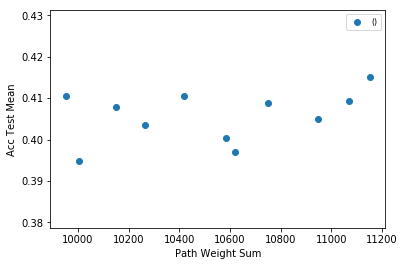

In [164]:

            
plot_stats(stats_df,  "Path Weight Sum", "Acc Test Mean", 
           filter_seperate=[], filter_not_seperate=[], 
           Y_axis_bounds=None)



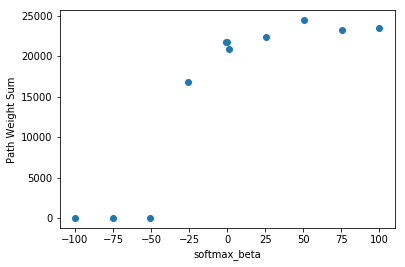

In [230]:

            
plot_stats(stats_df,  "softmax_beta", "Path Weight Sum", 
           filter_seperate=[], filter_not_seperate=[], 
           Y_axis_bounds=None)



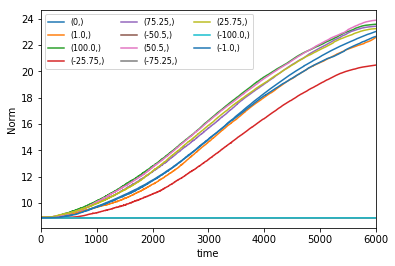

In [249]:
# pre_filtered_idxs = stats_df[(stats_df["softmax_beta"] >= 500) | (stats_df["softmax_beta"] <= -500 )].index
# pre_filtered_exp_dict = {i: exp_dict[i] for i in pre_filtered_idxs}

plot_special(exp_dict, "time", "Norm", 
             filter_seperate=[], filter_not_seperate=["softmax_beta"],
             save_exp_path=experiment_folder, X_axis_bounds=[0, 6000], Y_axis_bounds=None,
            pre_filtered_exp_ids=None, is_mean=True)


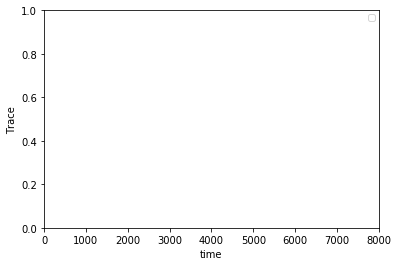

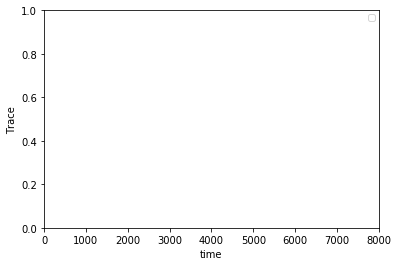

In [18]:

plot_special(exp_dict, "time", "Trace", 
             filter_seperate=["learning_rate"], filter_not_seperate=["softmax_beta"],
             save_exp_path=experiment_folder, X_axis_bounds=[0, 8000], Y_axis_bounds=None,
            pre_filtered_exp_ids=["1591383917.6910121",], is_mean=False)

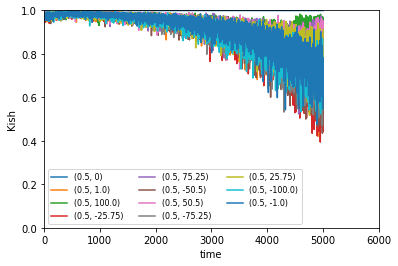

In [31]:
# pre_filtered_idxs = stats_df[(stats_df["softmax_beta"] >= 500) | (stats_df["softmax_beta"] <= -500 )].index
# pre_filtered_exp_dict = {i: exp_dict[i] for i in pre_filtered_idxs}

plot_special(exp_dict, "time", "Kish", 
             filter_seperate=["learning_rate"], filter_not_seperate=["softmax_beta"],
             save_exp_path=experiment_folder, X_axis_bounds=[0, 6000], Y_axis_bounds=[0, 1],
            pre_filtered_exp_ids=None)


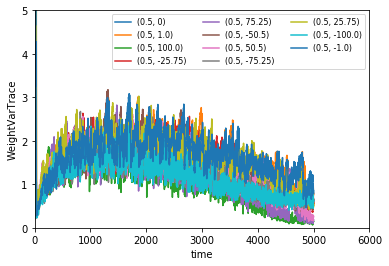

In [33]:
# pre_filtered_idxs = stats_df[(stats_df["softmax_beta"] >= 500) | (stats_df["softmax_beta"] <= -500 )].index
# pre_filtered_exp_dict = {i: exp_dict[i] for i in pre_filtered_idxs}

plot_special(exp_dict, "time", "WeightVarTrace", 
             filter_seperate=["learning_rate"], filter_not_seperate=["softmax_beta"],
             save_exp_path=experiment_folder, X_axis_bounds=[0, 6000], Y_axis_bounds=[0, 5],
            pre_filtered_exp_ids=None)


Correlation for (0.06, 0) trace:all/gap acc: 0.7109904194206443
Correlation for (0.06, 1.0) trace:all/gap acc: 0.7951262946255231
Correlation for (0.06, 100.0) trace:all/gap acc: 0.0954273031300073
Correlation for (0.06, -25.75) trace:all/gap acc: 0.8571782113303487
Correlation for (0.06, 75.25) trace:all/gap acc: -0.31783140061465226
Correlation for (0.06, -50.5) trace:all/gap acc: nan
Correlation for (0.06, 50.5) trace:all/gap acc: -0.12178301324150113
Correlation for (0.06, -75.25) trace:all/gap acc: nan
Correlation for (0.06, 25.75) trace:all/gap acc: -0.2025259389634717
Correlation for (0.06, -100.0) trace:all/gap acc: nan
Correlation for (0.06, -1.0) trace:all/gap acc: 0.9171589958238615


/Users/daniellengyel/flat_sharp/flat_sharp/utils.py:122: RuntimeWarning: invalid value encountered in double_scalars
  return (X - np.mean(X)).dot(Y - np.mean(Y)) / np.sqrt(np.var(X) * np.var(Y)) * 1 / float(len(Y))


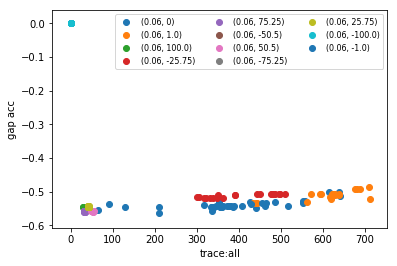

In [233]:
plot_special(exp_dict, "trace:all", 
             "gap acc", filter_seperate=["learning_rate"], filter_not_seperate=["softmax_beta"],
             save_exp_path=experiment_folder, X_axis_bounds=None)

Correlation for (0.06, 0) trace:all/gap loss: -0.6188603126525398
Correlation for (0.06, 1.0) trace:all/gap loss: -0.5036267617690707
Correlation for (0.06, 100.0) trace:all/gap loss: 0.15412573214211886
Correlation for (0.06, -25.75) trace:all/gap loss: 0.38295048534581794
Correlation for (0.06, 75.25) trace:all/gap loss: -0.08771809581586085
Correlation for (0.06, -50.5) trace:all/gap loss: 0.053723782545656726
Correlation for (0.06, 50.5) trace:all/gap loss: -0.4202324949612838
Correlation for (0.06, -75.25) trace:all/gap loss: -0.3941506377055044
Correlation for (0.06, 25.75) trace:all/gap loss: -0.17156238347640396
Correlation for (0.06, -100.0) trace:all/gap loss: -0.042664767084665225
Correlation for (0.06, -1.0) trace:all/gap loss: 0.026416233319044552


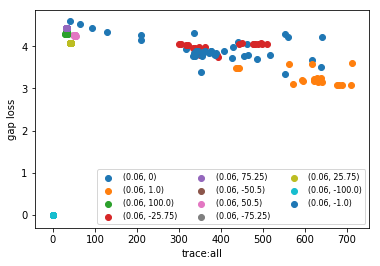

In [234]:
plot_special(exp_dict, "trace:all", 
             "gap loss", filter_seperate=["learning_rate"], filter_not_seperate=["softmax_beta"],
             save_exp_path=experiment_folder, X_axis_bounds=None)

Correlation for (0.5, 0) trace:all/acc test: -0.6642822298906338
Correlation for (0.5, 1.0) trace:all/acc test: -0.8850761547203934
Correlation for (0.5, 100.0) trace:all/acc test: 0.32171061863010336
Correlation for (0.5, -25.75) trace:all/acc test: -0.24606193121387848
Correlation for (0.5, 75.25) trace:all/acc test: -0.6634174074258008
Correlation for (0.5, -50.5) trace:all/acc test: -0.9364878046140171
Correlation for (0.5, 50.5) trace:all/acc test: -0.3446623914080357
Correlation for (0.5, -75.25) trace:all/acc test: -0.28778150051988616
Correlation for (0.5, 25.75) trace:all/acc test: -0.3931418029225196
Correlation for (0.5, -100.0) trace:all/acc test: -0.4951356320755934
Correlation for (0.5, -1.0) trace:all/acc test: -0.7950928009144312


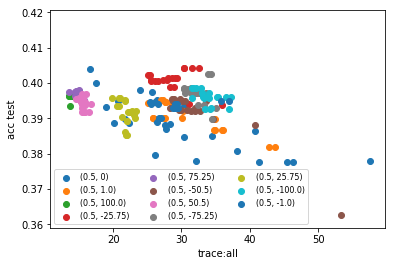

In [67]:
plot_special(exp_dict, "trace:all", 
             "acc test", filter_seperate=["learning_rate"], filter_not_seperate=["softmax_beta"],
             save_exp_path=experiment_folder, X_axis_bounds=None)


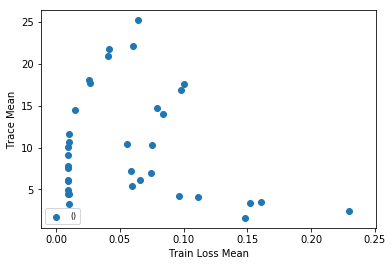

In [42]:

      
plot_stats(stats_df,  "Train Loss Mean", "Trace Mean",filter_by=[], seperate=True)



In [539]:
def sampling_plot_arr(values_arr, resampling_arr):
    x_vals = []
    y_vals = []

    for p in range(len(values_arr)):
        last_resampling = 0
        already_added = False

        for t in range(len(values_arr[p])):
            if resampling_arr[t][p] != p:
                if (last_resampling == 0) and (not already_added):
                    x_vals.append(list(range(last_resampling, t + 1)))
                    y_vals.append(values_arr[p][last_resampling:t + 1])
                    already_added = True
                else:
                    starts_at = values_arr[resampling_arr[last_resampling][p]][last_resampling]
                    x_vals.append(list(range(last_resampling, t + 1)))
                    y_vals.append([starts_at] + list(values_arr[p][last_resampling + 1:t + 1]))

                last_resampling = t

        if (last_resampling == 0):
            x_vals.append(list(range(last_resampling, t + 1)))
            y_vals.append(values_arr[p][last_resampling:t + 1])
        else:
            starts_at = values_arr[resampling_arr[last_resampling][p]][last_resampling]
            x_vals.append(list(range(last_resampling, t + 1)))
            y_vals.append([starts_at] + list(values_arr[p][last_resampling + 1:t + 1]))
    return x_vals, y_vals


In [540]:
y_vals[0].shape

(6000, 20)

In [139]:
Y_axis_name = "Potential/curr"
exp_ids = ["1591788816.278688"]

x_vals, y_vals = get_runs_arr(exp_dict, Y_axis_name, exp_ids)


In [140]:
y_vals[0].T[0]

array([0.21366821, 0.1769249 , 0.22196284, ..., 0.94053525, 0.24099749,
       1.49284363])

In [141]:
y_vals.shape

(1, 5000, 20)

In [142]:
time_range = [-10, -1]

sampling_arr = exp_dict["resampling_idxs"][exp_ids[0]]
resampling_arr = np.array([sampling_arr[str(i)] for i in range(len(sampling_arr))])[1:-1]
y_vals_reduced = y_vals[0][time_range[0]:time_range[1]]
resampling_arr_reduced = resampling_arr[time_range[0]: time_range[1]]
n_x, n_y = sampling_plot_arr(y_vals_reduced.T, resampling_arr_reduced)

In [232]:

exp_id = "1590496353.8190389" # sharp
# exp_id = "1590496353.106369" # flat

exp_id = "1590274168.6045089"

model_a = exp_dict["models"][exp_id][str(0)]
net = copy.deepcopy(model_a)


In [235]:
# get data
train_data, test_data = get_postprocessing_data(experiment_folder, vectorized=True)
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)  # fix the batch size
full_train_loader = DataLoader(train_data, batch_size=len(train_data), shuffle=True)  # fix the batch size

test_loader = DataLoader(test_data, batch_size=1 ) #len(test_data))

criterion = torch.nn.CrossEntropyLoss()
cfs_dict = exp_dict["stuff"]["configs"].loc[exp_id].to_dict()
optimizer = optim.SGD(net.parameters(), lr=cfs_dict["learning_rate"],
                                    momentum=cfs_dict["momentum"])
num_steps = 1000

data = next(iter(full_train_loader))

model_b, grad_arr, projs = take_n_gd_steps(net, optimizer, criterion, data, n=num_steps, get_grad=False,
                                           v1=None, v2=None, offset=model_a)



0
tensor(0.0088, grad_fn=<NllLossBackward>)

100
tensor(0.0081, grad_fn=<NllLossBackward>)

200
tensor(0.0076, grad_fn=<NllLossBackward>)

300
tensor(0.0071, grad_fn=<NllLossBackward>)

400
tensor(0.0067, grad_fn=<NllLossBackward>)

500
tensor(0.0063, grad_fn=<NllLossBackward>)

600
tensor(0.0060, grad_fn=<NllLossBackward>)

700
tensor(0.0057, grad_fn=<NllLossBackward>)

800
tensor(0.0054, grad_fn=<NllLossBackward>)

900
tensor(0.0052, grad_fn=<NllLossBackward>)



In [410]:
d_t = []
for i, (data, target) in enumerate(train_loader):
    d_t.append((data, target))
    
    break

In [36]:

beta_bound = [-3,3]
num_inter_models = 20

inter_a = get_model_interpolate_arr(model_c, model_d, num_inter_models, beta_bound=beta_bound)

In [37]:
model_dict = {str(i): inter_a[i] for i in range(len(inter_a))}

In [38]:
traces = get_models_trace(model_dict, full_train_loader, criterion, full_dataset=False)
loss_dict,acc_dict = get_models_loss_acc(model_dict, full_train_loader, test_loader)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [365]:
def get_gap(b):
    a = list(b.values())[0]
    return a[1] - a[0]

In [94]:
print("Trace flat: {}".format(np.mean(list(trace.values())[0])))

print("Acc flat: {}".format(get_gap(acc_dict)))
print("Loss flat: {}".format(get_gap(loss_dict)))

Trace flat: 2.773572015762329
Acc flat: -0.055400000000000005
Loss flat: 0.23567577661015093


19


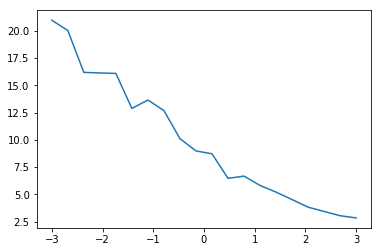

In [39]:

xs = np.linspace(beta_bound[0], beta_bound[1], num_inter_models)
ys = [np.mean(traces[a]) for a in traces]
print(np.argmin(ys))
plt.plot(xs, ys)

19


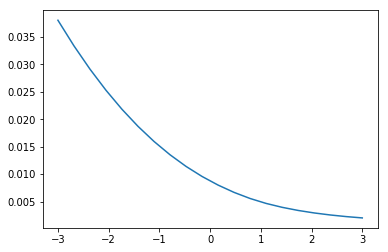

In [40]:

xs = np.linspace(beta_bound[0], beta_bound[1], num_inter_models)
ys = [loss_dict[a][0] for a in loss_dict]
print(np.argmin(ys))
plt.plot(xs, ys)

19


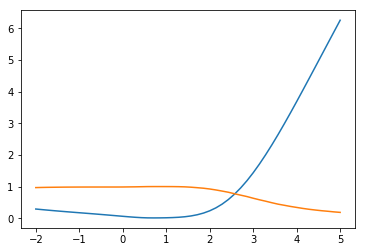

In [207]:

xs = np.linspace(beta_bound[0], beta_bound[1], 50)
loss_arr = [loss_dict[a][0] for a in loss_dict]
acc_arr = [acc_dict[a][0] for a in acc_dict]
trace_arr = [np.mean(traces[a]) for a in traces]

print(np.argmin(ys))
plt.plot(xs, loss_arr)
plt.plot(xs, acc_arr)
# plt.plot(xs, trace_arr)

16


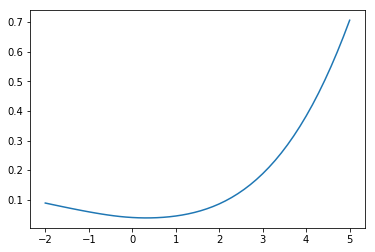

In [150]:
xs = np.linspace(beta_bound[0], beta_bound[1], num_inter_models)
ys = [float(a[0]) for a in i_a[1]]
print(np.argmin(ys))

plt.plot(xs, ys)

In [ ]:
def project_onto(net, v1, v2):
    v1_norm = v1/torch.norm(v1)
    v2_norm = v2/torch.norm(v2)
    
    net_vect = get_params_vec(net)
    alpha = torch.matmul(v1_norm, net_vect)
    beta = torch.matmul(v2_norm, net_vec)
    
    return alpha, beta

In [195]:
np.e**250 - np.e**240

3.7462845257262665e+108

In [196]:
x=  np.random.normal(scale=1, size=(1000, 2))
y = 1 * (x[:, 0] >= 0)
ct = 0
def flip(val, alpha):
    should_flip = np.random.uniform(0, 1)<alpha
    global ct
    if should_flip:
        ct += 1
        if val == 0:
            val = 1
        elif val == 1:
            val = 0
    return val
y = [flip(a, 0.05) for a in y]
x += np.random.normal(scale=0.15, size=x.shape)

In [197]:
c = 0
for a, b in zip(x, y):
    if (a[0] < 0) and (b == 1):
        c+=1
    elif (a[0] > 0) and (b == 0):
        c+=1 

In [5]:
import numpy as np

In [6]:
def get_max(n, mu, cov):
    Xs = np.random.multivariate_normal(mu, cov, n)
    Xs_sq = [np.linalg.norm(x)**2 for x in Xs]
    return np.linalg.norm(Xs[np.argmax(Xs_sq)])

def get_mean(mu, cov, num_rv_samples, N):
    Rs = []
    for _ in range(num_rv_samples):
        Rs.append(get_max(N, mu, cov))
        
    return np.mean(Rs)

In [11]:
from scipy.stats import ortho_group  # Requires version 0.18 of scipy

import matplotlib.pyplot as plt

In [9]:
N = 100
res = []
dim = 5

mu = np.zeros(dim)



for _ in range(0, 100, 1):
    eigs = np.random.uniform(0, 100, dim)
    d_eigs = np.diag(eigs)
    P = ortho_group.rvs(dim=dim)

    cov = P.T.dot(d_eigs.dot(P))
    a = np.sqrt(eigs.dot(eigs))
    res.append((a, get_mean(mu, cov, 100, N)))
res = np.array(res)

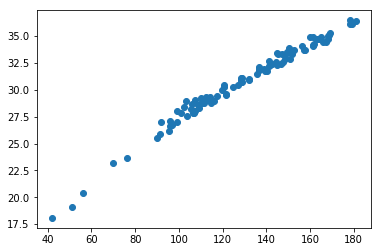

In [12]:
plt.scatter(res[:, 0], res[:, 1])

In [55]:
N = 20
res = []
mu = np.array([0, 0])
for a in range(1000):
    res.append((a, 5*((a**2 + 1**2 + 500**2))**0.5))
res = np.array(res)

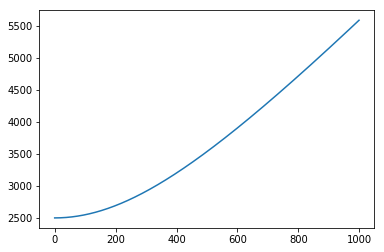

In [56]:
plt.plot(res[:, 0], res[:, 1])

In [113]:
import plotly.graph_objects as go

X = np.linspace(-10,  10, 100)
Y = np.linspace(-50,  50, 100)
inp = np.meshgrid(X, Y)
Z = inp[0] ** 2
fig = go.Figure(data=[go.Surface(z=Z, x=inp[0], y=inp[1], colorscale="Viridis")])

fig.update_layout(title='Function', autosize=False,
                  width=1000, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [83]:
m = 5
d = 2

g = lambda x: m*x + d
f = lambda x: m*x + d + np.random.normal(scale=15)
X = np.linspace(-10, 10, 100)
Y = [(x, f(x)) for x in X]
Y += [(x, f(x)) for x in X]
Y = np.array(Y)

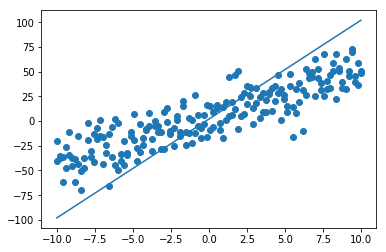

In [84]:
h = lambda x: 10*x + d


plt.scatter(Y[:, 0], Y[:, 1])
plt.plot(X, [h(x) for x in X])

In [115]:
W = np.linspace(-20, 20, 100)
B = np.linspace(-3, 6, 100)

inp = np.array(np.meshgrid(W, B)).T

L = lambda w, b: 1/len(Y) * np.sum([(w*x + b - y)**2 for x, y in Y])

In [122]:
L(10, 9)

1215.4751854022416

In [116]:
z = []
mini_val = float("inf")
mini_params = None
for i in range(len(inp)):
    curr = []
    for j in inp[i]:
        curr.append(L(*j))
        if curr[-1] < mini_val:
            mini_val = curr[-1]
            mini_params = j
    z.append(curr)



In [117]:
mini_params

array([4.64646465, 4.54545455])

In [118]:
z = np.array(z)

In [123]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=z.T, x=inp.T[0], y=inp.T[1], colorscale="Viridis")])

# fig.update_layout(title='Function', autosize=False,
#                   width=1000, height=800,
#                   margin=dict(l=65, r=50, b=65, t=90))

fig.show()

(5000, 20)

In [181]:
a = find_lineages(resampling_arr)

0.5553889274597168


In [251]:
take_slice(b, [[1, 0], [0, 1]])

[array([2, 1]), array([3, 4])]

In [7]:
def get_linages_vals(lineages, val_arr):
    arr_lineages = np.array(list(lineages.values()))
    return np.array(take_slice(val_arr, arr_lineages.T)).T

In [258]:
res_ids = [[0, 1, 2], [1, 1, 2], [0, 1, 2], [2, 1, 0], [1, 0, 1]]
lineages, assignments = find_lineages(res_ids)


In [259]:
val_arr = [[100, 200, 300], [1, 2, 3], [6, 2, 74], [7, 3, 67], [12, 4, 2]]



array([[200,   2,   2,   3,   4],
       [300,   3,  74,  67,  12]])

In [273]:
Y_axis_name = "Potential/curr"
exp_ids = ["1590274168.6045089"] 
# exp_ids = ["1592003257.678787"]

x_vals, y_vals = get_runs_arr(exp_dict, Y_axis_name, exp_ids)


In [274]:
time_range = [-10, -1]

sampling_arr = exp_dict["resampling_idxs"][exp_ids[0]]
resampling_arr = np.array([sampling_arr[str(i)] for i in range(len(sampling_arr))])[1:-1]
y_vals_reduced = y_vals[0][time_range[0]:time_range[1]]
resampling_arr_reduced = resampling_arr[time_range[0]:time_range[1]]

In [275]:
lineages, assignments = find_lineages(resampling_arr)

b = get_linages_vals(lineages, np.array(y_vals[0]))

dict_keys([15, 10])
{4: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}


In [179]:
resampling_arr[4976:4978]

array([[13, 12,  0,  7,  4,  0, 15, 14, 16, 18,  7,  6, 15,  5,  3,  8,
         5, 13, 15, 16],
       [15, 16,  7,  0,  2, 16, 14,  9, 11, 13,  3, 19, 13, 17, 18,  8,
        14,  3, 14, 10]])

In [173]:
a = list(lineages.values())
a = np.array(a).T

In [107]:
a[4977]

array([ 3, 10, 10,  3, 10, 10, 10,  3, 10, 10,  3])

In [272]:
np.sum(b[0])

843.1131984721869

In [276]:
np.sum(b[0])

636.8659511697479

In [266]:


stats_df = get_end_stats(exp_dict)
# stats_df = stats_df[stats_df["Mean Train Loss"] < 0.25]
stats_df.sort_values(by="Path Weight Sum", ascending=False)

Acc Test Max  Acc Test Mean  Acc Test Min  Acc Train Max  \
1590274168.6045089        0.9398       0.939725        0.9397       0.985667   
1590274169.318323         0.9493       0.949250        0.9492       0.990167   
1590273013.958532         0.9422       0.942085        0.9419       0.992833   
1590273481.150822         0.9507       0.950455        0.9501       0.992333   
1590258146.3691258        0.9449       0.944420        0.9438       1.000000   
1590258138.459473         0.9444       0.942915        0.9418       1.000000   
1590258142.795455         0.9441       0.943670        0.9434       1.000000   
1590258140.47573          0.9445       0.944175        0.9440       1.000000   
1590258144.654412         0.9437       0.943145        0.9429       1.000000   
1590258148.1805718        0.9431       0.942660        0.9424       1.000000   
1590274124.349066         0.9430       0.942925        0.9429       1.000000   
1590258147.138657         0.9490       0.948720        0.9485       0.999500   
1590258143.5921988        0.9506       0.950430        0.9502       1.000000   
1590258141.549438         0.9514       0.950905        0.9507       1.000000   
1590258139.372339         0.9527       0.950400        0.9485       1.000000   
1590258145.777937         0.9479       0.947720        0.9474       1.000000   
1590258149.216182         0.9511       0.950950        0.9508       1.000000   
1590274152.405887         0.9504       0.950310        0.9503       1.000000   

                    Acc Train Mean  Acc Train Min   Dist Max  Dist Mean  \
1590274168.6045089        0.985667       0.985667  23.429565  23.159874   
1590274169.318323         0.990167       0.990167  30.266439  30.041732   
1590273013.958532         0.992833       0.992833  23.787024  23.513069   
1590273481.150822         0.992333       0.992333  31.320831  31.098688   
1590258146.3691258        1.000000       1.000000  24.509089  24.234799   
1590258138.459473         1.000000       1.000000  20.374111  20.048445   
1590258142.795455         1.000000       1.000000  24.569567  24.295405   
1590258140.47573          1.000000       1.000000  24.566637  24.292101   
1590258144.654412         1.000000       1.000000  24.417875  24.154645   
1590258148.1805718        1.000000       1.000000  24.908764  24.635928   
1590274124.349066         1.000000       1.000000  24.673094  24.418802   
1590258147.138657         0.999500       0.999500  33.379387  33.165922   
1590258143.5921988        1.000000       1.000000  36.445019  36.252909   
1590258141.549438         1.000000       1.000000  36.485943  36.288279   
1590258139.372339         1.000000       1.000000  34.152481  31.314790   
1590258145.777937         1.000000       1.000000  33.839199  33.653264   
1590258149.216182         1.000000       1.000000  36.937851  36.757661   
1590274152.405887         1.000000       1.000000  35.382759  35.196056   

                     Dist Min  Gap Mean  ...  Loss Train Max  Loss Train Mean  \
1590274168.6045089  18.837921 -0.045942  ...        0.088939         0.088840   
1590274169.318323   26.763042 -0.040917  ...        0.075427         0.075360   
1590273013.958532   19.262140 -0.050748  ...        0.046968         0.046720   
1590273481.150822   27.944061 -0.041878  ...        0.045063         0.045000   
1590258146.3691258  20.148273 -0.055580  ...        0.003347         0.003323   
1590258138.459473   19.676243 -0.057085  ...        0.003370         0.003106   
1590258142.795455   20.216843 -0.056330  ...        0.003191         0.003171   
1590258140.47573    20.218199 -0.055825  ...        0.003166         0.003159   
1590258144.654412   19.995667 -0.056855  ...        0.003024         0.003010   
1590258148.1805718  20.607590 -0.057340  ...        0.002725         0.002719   
1590274124.349066   20.297909 -0.057075  ...        0.002201         0.002199   
1590258147.138657   30.236176 -0.050780  ...        0.003030         0.002990   
1590258143.5921988  

In [174]:
a = list(lineages.values())
a = np.array(a)

In [175]:
a.shape

(11, 5000)

In [176]:
for t, c in enumerate(a.T):
    if len(set(c)) > 1:
        print(c)
        print(t)
        break
        
    

[ 3 10 10  3 10  3  3  3 10  3  3]
4977


In [91]:
a.T[4977:4980]

array([[ 3, 10, 10,  3, 10, 10, 10,  3, 10, 10,  3],
       [10, 19, 19, 10, 19, 19, 19, 10, 19, 19, 10],
       [18,  7,  7, 18,  7,  7,  7, 18,  7,  7, 18]])

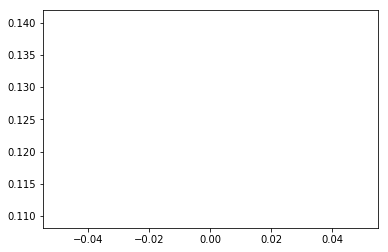

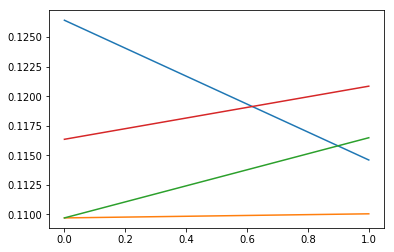

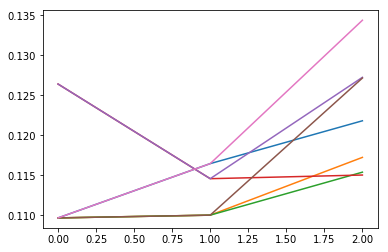

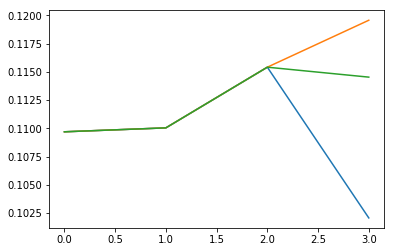

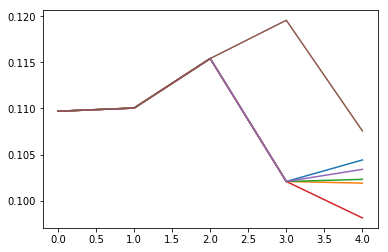

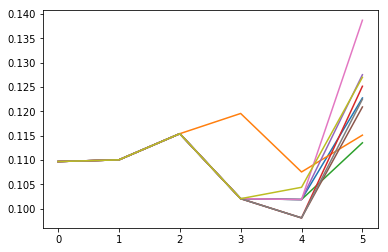

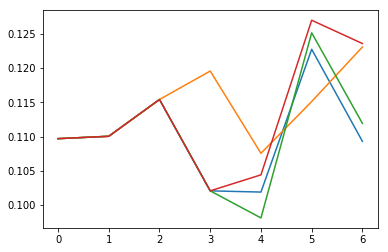

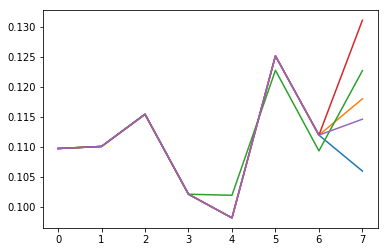

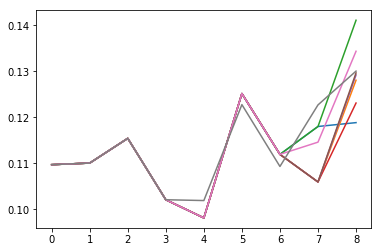

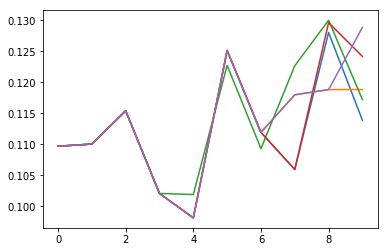

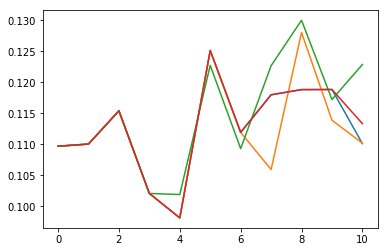

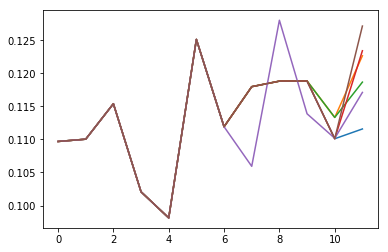

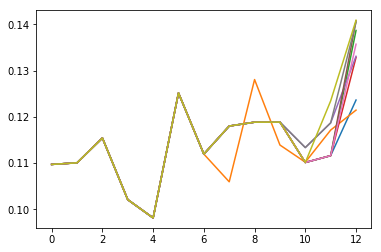

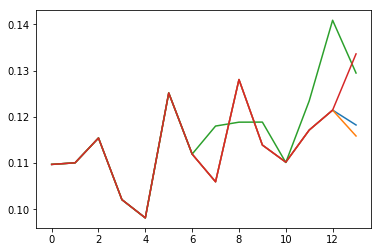

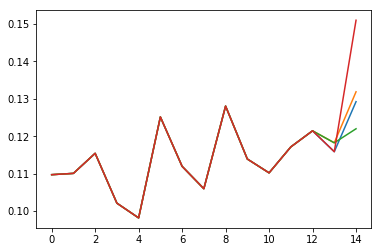

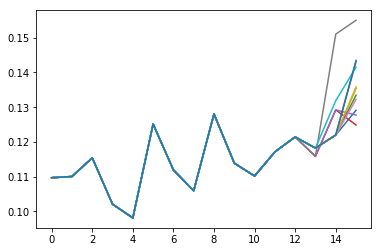

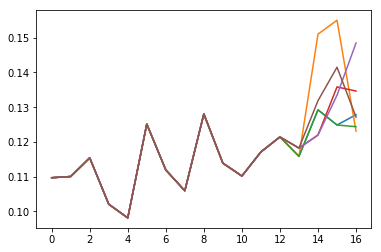

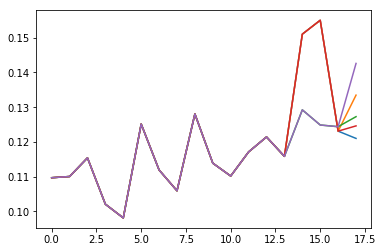

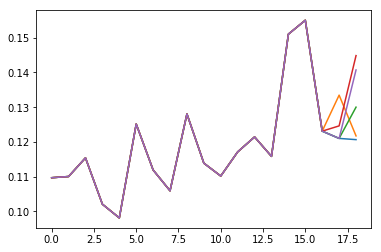

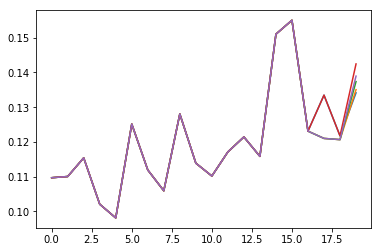

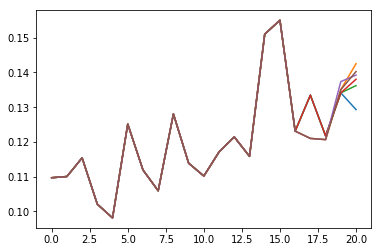

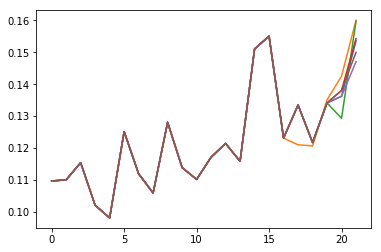

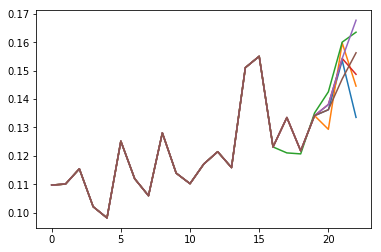

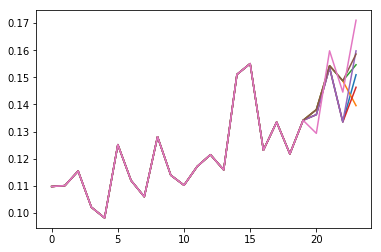

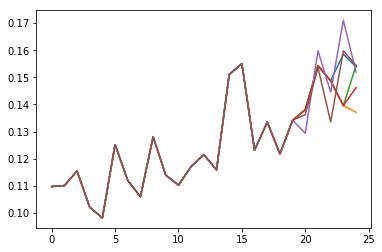

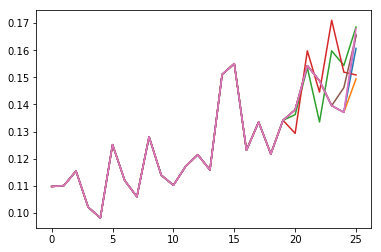

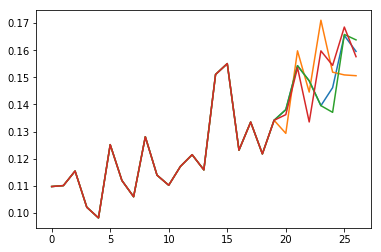

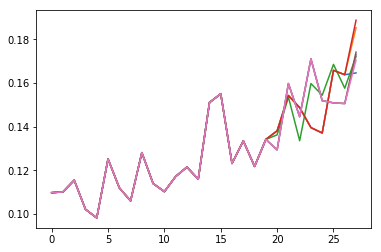

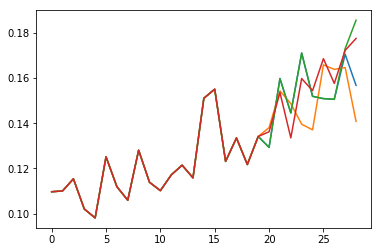

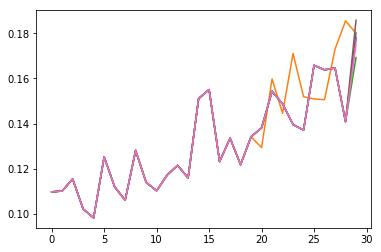

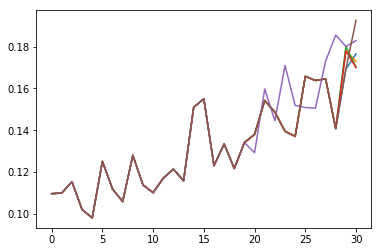

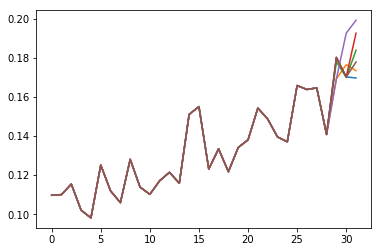

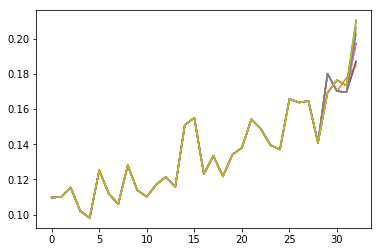

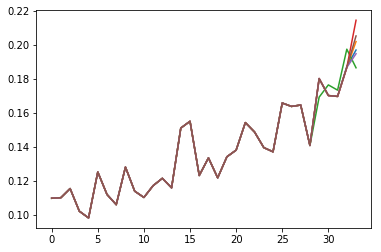

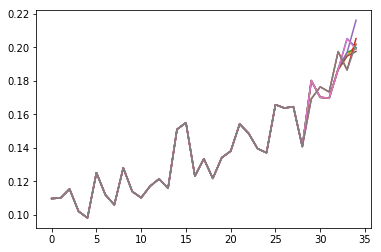

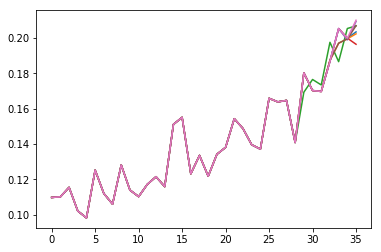

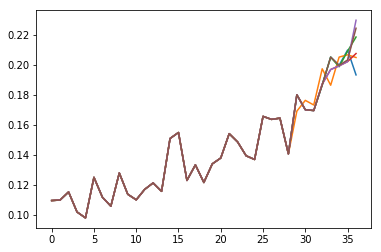

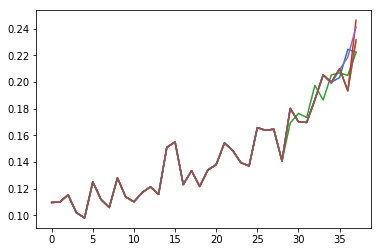

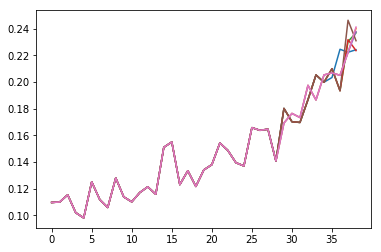

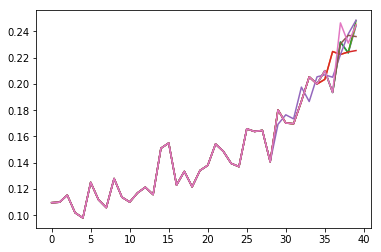

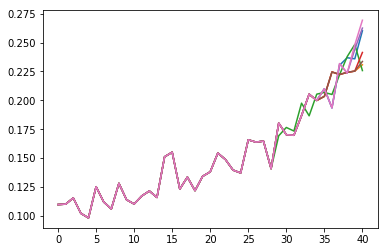

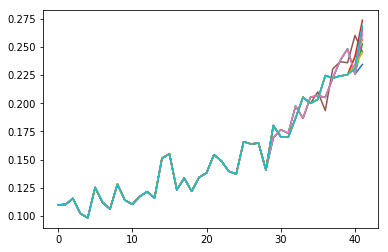

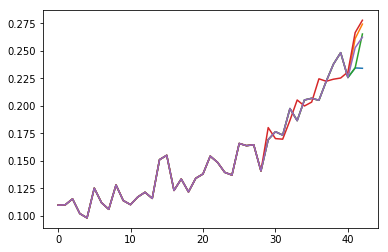

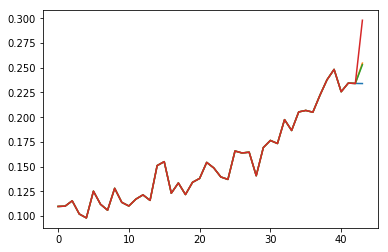

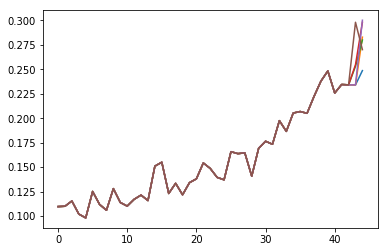

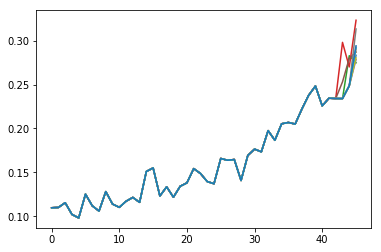

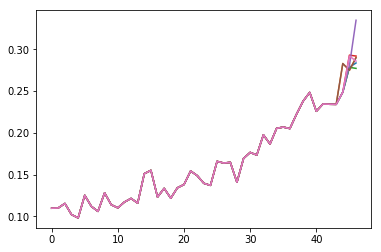

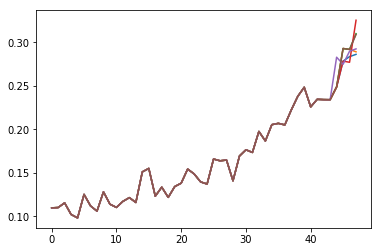

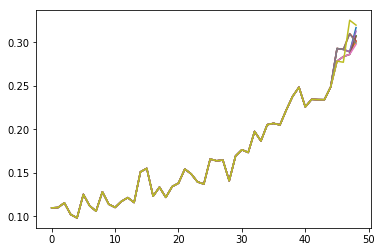

In [277]:
for t in range(1, 50):

    lineages, assignments = find_lineages(resampling_arr[:t])
    b = get_linages_vals(lineages, np.array(y_vals[0])[:t])
    for k in b:
        plt.plot(k)
    plt.show()

In [142]:
lineages, assignments = find_lineages(resampling_arr[:400])


In [254]:
a = np.array(list(lineages.values()))

In [252]:
lineages, assignments = find_lineages(resampling_arr[1:])
